In [18]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway, mannwhitneyu, bartlett, ttest_1samp, ttest_ind, norm
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare, chi2_contingency

In [2]:
pwd C:\Users\ASUS\Desktop\great learning\week3

'C:\\Users\\ASUS\\Desktop\\great learning\\week3'

In [3]:
H=pd.read_table("HR.txt", index_col=0)

In [4]:
H.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
H.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Question: What is the reason affecting attrition

#### Years with current manager influencing attrition. If so, further investigate with suitable statistical learning test with appropriate findings/ evidence

In [6]:
H['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [7]:
H["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
B= pd.crosstab(H["Attrition"], H["YearsWithCurrManager"])
B

YearsWithCurrManager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attrition,,,,,,,,,,,,,,,,,,
No,178,65,294,123,87,27,25,185,97,58,24,21,18,14,3,5,2,7
Yes,85,11,50,19,11,4,4,31,10,6,3,1,0,0,2,0,0,0


In [14]:
chi2_contingency(B)

(74.6171841152656,
 3.40833711883961e-09,
 17,
 array([[220.59795918,  63.74693878, 288.53877551, 119.10612245,
          82.2       ,  26.00204082,  24.3244898 , 181.1755102 ,
          89.74897959,  53.68163265,  22.64693878,  18.45306122,
          15.09795918,  11.74285714,   4.19387755,   4.19387755,
           1.67755102,   5.87142857],
        [ 42.40204082,  12.25306122,  55.46122449,  22.89387755,
          15.8       ,   4.99795918,   4.6755102 ,  34.8244898 ,
          17.25102041,  10.31836735,   4.35306122,   3.54693878,
           2.90204082,   2.25714286,   0.80612245,   0.80612245,
           0.32244898,   1.12857143]]))

In [16]:
B1=pd.crosstab(H[H["YearsWithCurrManager"]>10]["YearsWithCurrManager"],H["Attrition"])
B1

Attrition,No,Yes
YearsWithCurrManager,,
11,21,1
12,18,0
13,14,0
14,3,2
15,5,0
16,2,0
17,7,0


In [17]:
chi2_contingency(B1)

(18.32584415584416, 0.005467455934292397, 6, array([[21.09589041,  0.90410959],
        [17.26027397,  0.73972603],
        [13.42465753,  0.57534247],
        [ 4.79452055,  0.20547945],
        [ 4.79452055,  0.20547945],
        [ 1.91780822,  0.08219178],
        [ 6.71232877,  0.28767123]]))

In [ ]:
# from chi square test, since the p-val is small, we reject the null hypothesis
#thus there is a dependency of Years worked with current manager and attrition
# if we check crosstab of both the variables,
#after 10 yrs with same manager, people are not leaving, maybe they are in their comfort level
#freshers are leaving more

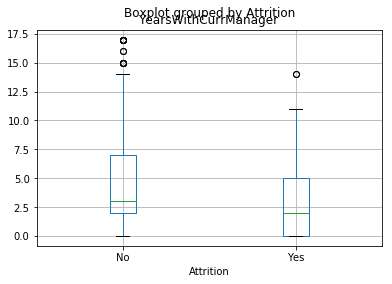

In [24]:
H.boxplot(column='YearsWithCurrManager', by= 'Attrition')

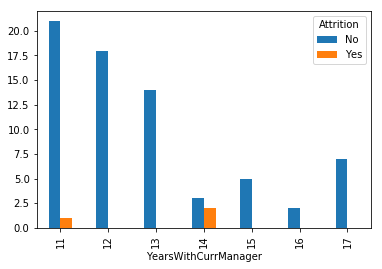

In [28]:
B1.plot(kind= 'bar')

#### Effect of educational field on attrition
1. operations
2. it
3. sales
4. Marketing
5. HR
6. Supporting staff

In [29]:
H['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [32]:
C= pd.crosstab(H["Attrition"], H["EducationField"])
C

EducationField,1,2,3,4,5,6
Attrition,,,,,,
No,517,401,124,100,20,71
Yes,89,63,35,32,7,11


In [ ]:
# 4,5 are marketing and HR which are more linked to the outer world, thus they can be easily lured

In [34]:
chi2_contingency(C)

(16.024674119585423,
 0.006773980139025222,
 5,
 array([[508.29795918, 389.19183673, 133.36530612, 110.71836735,
          22.64693878,  68.77959184],
        [ 97.70204082,  74.80816327,  25.63469388,  21.28163265,
           4.35306122,  13.22040816]]))

In [37]:
def twosampz(x1,x2,n1,n2):
    p1=x1/n1
    p2=x2/n2
    pp=(x1+x2)/(n1+n2)
    zdata=(p1-p2)/np.sqrt((pp*(1-pp))*(1/n1+1/n2))
    pval=2*(1-norm.cdf(abs(zdata)))
    return round(zdata,4), round(pval,4)

In [38]:
twosampz(32, 7, 132, 27)

(-0.1852, 0.853)

In [ ]:
#x1 is marketing people with yes attrition

#high p-val, meaning proportion is high, we cant say that hr has less data, we cant ignore it
# HR and marketing people are leaving more

#### no. of companies worked with attrition

In [39]:
H['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [41]:
D= pd.crosstab(H['Attrition'],H['NumCompaniesWorked'] )
D

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
No,174,423,130,143,122,47,54,57,43,40
Yes,23,98,16,16,17,16,16,17,6,12


In [42]:
chi2_contingency(D)

(25.74440441715132,
 0.002249178294685049,
 9,
 array([[165.23877551, 437.00204082, 122.46122449, 133.36530612,
         116.58979592,  52.84285714,  58.71428571,  62.06938776,
          41.1       ,  43.61632653],
        [ 31.76122449,  83.99795918,  23.53877551,  25.63469388,
          22.41020408,  10.15714286,  11.28571429,  11.93061224,
           7.9       ,   8.38367347]]))

chi value is high and p value is low, so we reject the null hypothesis
thus there is a dependance of num of companies worked and attrition
people leaving a lot are likely to leave more

#### Percentage salary hike dependance on attrition



In [43]:
H['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [45]:
E= pd.crosstab(H['Attrition'],H['PercentSalaryHike'] )
E

PercentSalaryHike,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Attrition,,,,,,,,,,,,,,,
No,169,165,175,177,83,64,68,76,67,48,43,44,22,15,17
Yes,41,33,34,24,18,14,14,13,9,7,5,12,6,6,1


In [46]:
chi2_contingency(E)

(13.352748467459847,
 0.49895522292726846,
 14,
 array([[176.14285714, 166.07755102, 175.30408163, 168.59387755,
          84.71632653,  65.4244898 ,  68.77959184,  74.65102041,
          63.74693878,  46.13265306,  40.26122449,  46.97142857,
          23.48571429,  17.61428571,  15.09795918],
        [ 33.85714286,  31.92244898,  33.69591837,  32.40612245,
          16.28367347,  12.5755102 ,  13.22040816,  14.34897959,
          12.25306122,   8.86734694,   7.73877551,   9.02857143,
           4.51428571,   3.38571429,   2.90204082]]))

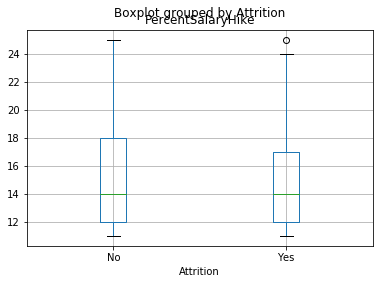

In [47]:
H.boxplot(column="PercentSalaryHike",by="Attrition")

p value is high in this case, so we fail to reject the null hypothesis which implies there is no dependence in attrition rate 
and percentage salary hike
Even by seeing the box plot we see independence

#### years in current role and attrition

In [48]:
H["YearsInCurrentRole"].value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [51]:
F= pd.crosstab(H["Attrition"], H["YearsInCurrentRole"])
F

YearsInCurrentRole,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Attrition,,,,,,,,,,,,,,,,,,,
No,171,46,304,119,89,35,35,191,82,61,27,22,9,13,10,6,7,4,2
Yes,73,11,68,16,15,1,2,31,7,6,2,0,1,1,1,2,0,0,0


In [55]:
H_yr=H.groupby("Attrition")
H_yes=H_yr.get_group("Yes")
H_no=H_yr.get_group("No")

In [54]:
H_yes["YearsInCurrentRole"].mean()

2.9029535864978904

In [56]:
H_no["YearsInCurrentRole"].mean()

4.484184914841849

In [ ]:
#people leaving are less experienced, also seen in context to manager, people working for less yr under same manager
# are leaving more

In [52]:
chi2_contingency(F)

(64.30094425056491,
 4.056019050520379e-07,
 18,
 array([[204.66122449,  47.81020408, 312.0244898 , 113.23469388,
          87.23265306,  30.19591837,  31.03469388, 186.20816327,
          74.65102041,  56.19795918,  24.3244898 ,  18.45306122,
           8.3877551 ,  11.74285714,   9.22653061,   6.71020408,
           5.87142857,   3.35510204,   1.67755102],
        [ 39.33877551,   9.18979592,  59.9755102 ,  21.76530612,
          16.76734694,   5.80408163,   5.96530612,  35.79183673,
          14.34897959,  10.80204082,   4.6755102 ,   3.54693878,
           1.6122449 ,   2.25714286,   1.77346939,   1.28979592,
           1.12857143,   0.64489796,   0.32244898]]))

In [ ]:
#can be treated as categorical. results are same in both continous and categorical. 
#results are same
#but the interpretation as continous is easy
#for many categories, like more than 10-12, treat as continous variable

since there is a low p value, then we reject the null hypothesis, which implies there is a dependency in years in current role
and attrition